In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
cleaned_df = pd.read_csv("clean.csv")
cleaned_df.head()

,Unnamed: 0,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,...,Medicaid HDHP.1,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,0,H056808,3,50,1,1,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,1,H018779,3,53,1,7,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,2,H049265,3,56,1,8,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,3,H007699,3,57,2,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,4,H066034,3,25,1,4,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN


In [3]:
# cleaned_df.columns

In [4]:
demographics = [
    'Unique ID', 
    'Household region', 
    'Age of sample adult', 
    'Sex of sample adult', 
    'Education of sample adult', 
    'Hispanic ethnicity of SA', 
    'Single + Mult race gps w Hispanic origin', 
    'Hispanic origin detail', 
    'Single and multiple race groups', 
    'Ever had Diabetes?',  
    'Weight without shoes (pounds)', 
    'Categorical Body Mass Index']
demographics_df = cleaned_df[demographics]
demographics_df.head(20)

,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,Ever had Diabetes?,Weight without shoes (pounds),Categorical Body Mass Index
0,H056808,3,50,1,1,2,2,3,1,2,199,3
1,H018779,3,53,1,7,2,3,3,2,1,205,3
2,H049265,3,56,1,8,2,2,3,1,2,160,3
3,H007699,3,57,2,5,2,2,3,1,2,190,4
4,H066034,3,25,1,4,2,3,3,2,2,250,4
5,H037403,3,55,1,5,2,3,3,2,2,200,3
6,H023974,3,45,1,9,2,2,3,1,2,997,9
7,H025636,3,41,1,5,2,3,3,2,2,206,3
8,H018455,3,26,2,4,2,3,3,2,2,996,4
9,H030679,3,71,2,9,2,2,3,1,2,127,2


In [5]:
# Rename Columns
dem_diabetes_df = demographics_df.rename(columns={ 
        'Unique ID': 'ID', 
        'Household region': 'Region', 
        'Age of sample adult': 'Age', 
        'Sex of sample adult': 'Gender', 
        'Education of sample adult': 'Education', 
        'Hispanic ethnicity of SA': 'Hispanic_Origin', 
        'Single + Mult race gps w Hispanic origin': 'Hispanic_Multiracial', 
        'Hispanic origin detail': 'Hispanic Type', 
        'Single and multiple race groups': 'Multiracial', 
        'Ever had Diabetes?': 'Diabetic?',  
        'Weight without shoes (pounds)': 'Weight(lbs)', 
        'Categorical Body Mass Index': 'BMI'})
dem_diabetes_df.head()

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,1,1,2,2,3,1,2,199,3
1,H018779,3,53,1,7,2,3,3,2,1,205,3
2,H049265,3,56,1,8,2,2,3,1,2,160,3
3,H007699,3,57,2,5,2,2,3,1,2,190,4
4,H066034,3,25,1,4,2,3,3,2,2,250,4


In [6]:
dem_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29482 entries, 0 to 29481
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    29482 non-null  object
 1   Region                29482 non-null  int64 
 2   Age                   29482 non-null  int64 
 3   Gender                29482 non-null  int64 
 4   Education             29482 non-null  int64 
 5   Hispanic_Origin       29482 non-null  int64 
 6   Hispanic_Multiracial  29482 non-null  int64 
 7   Hispanic Type         29482 non-null  int64 
 8   Multiracial           29482 non-null  int64 
 9   Diabetic?             29482 non-null  int64 
 10  Weight(lbs)           29482 non-null  int64 
 11  BMI                   29482 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 2.7+ MB


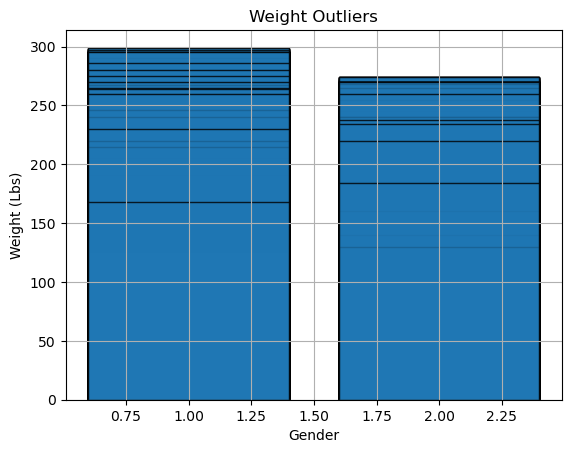

In [7]:
# Due to noticing +900lb weight figures, will create scatter plot to spot weight outliers

weight = dem_diabetes_df['Weight(lbs)']
gender = dem_diabetes_df['Gender']

for i in weight:
    if i > 900:
        weight.replace([i], [np.NaN], inplace=True)

plt.bar(gender,
            weight,
            edgecolor="black",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("Weight Outliers")

plt.ylabel("Weight (Lbs)")

plt.xlabel("Gender")

plt.grid(True)

# Show plot.

plt.show()


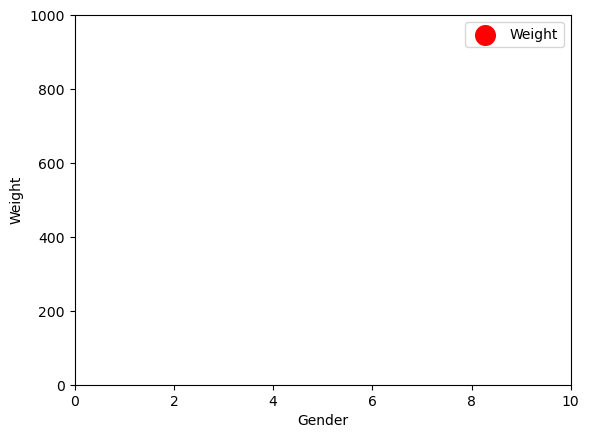

In [8]:
plt.scatter(weight, gender, c='r', label='Weight', s=weight)

plt.legend()

plt.xlabel('Gender')

plt.ylabel('Weight')

plt.xlim(0,10)

plt.ylim(0,1000)

plt.show()

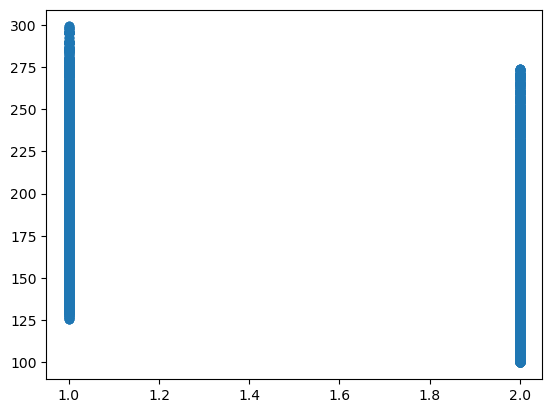

In [9]:
fig, ax = plt.subplots()

ax.scatter(gender, weight)

In [10]:
# diabetic = dem_diabetes_df['Diabetic?'].count
diabetic = dem_diabetes_df['Diabetic?'].value_counts()[1]
diabetic

3134

In [11]:
# fig, ax = plt.subplots()

# ax.scatter(diabetic, weight)

In [12]:
dem_diabetes_df['Diabetic?'].unique()

array([2, 1, 7, 9])

In [13]:
dem_diabetes_df['Weight(lbs)'].unique()

array([199., 205., 160., 190., 250., 200.,  nan, 206., 127., 100., 208.,
       170., 120., 165., 225., 150., 285., 178., 210., 249., 245., 191.,
       235., 136., 166., 140., 174., 157., 215., 155., 240., 185., 119.,
       121., 280., 180., 115., 230., 172., 181., 189., 175., 162., 176.,
       290., 133., 122., 299., 109., 118., 128., 156., 220., 152., 130.,
       286., 197., 204., 125., 110., 234., 168., 146., 126., 135., 148.,
       298., 138., 218., 164., 265., 260., 134., 106., 179., 196., 145.,
       273., 143., 163., 123., 158., 207., 108., 228., 105., 193., 195.,
       132., 238., 233., 184., 198., 177., 103., 142., 212., 211., 171.,
       144., 114., 167., 141., 151., 137., 214., 147., 139., 131., 203.,
       111., 270., 129., 241., 173., 153., 188., 159., 209., 247., 187.,
       117., 283., 169., 267., 186., 113., 274., 248., 223., 194., 252.,
       269., 217., 268., 182., 183., 231., 116., 272., 237., 192., 224.,
       239., 243., 226., 154., 236., 101., 107., 25

In [14]:
dem_diabetes_df['Gender'].unique()

array([1, 2, 9, 7])

In [15]:
dem_diabetes_df['Age'].unique()

array([50, 53, 56, 57, 25, 55, 45, 41, 26, 71, 69, 44, 36, 59, 63, 48, 82,
       74, 67, 76, 49, 72, 62, 73, 47, 85, 43, 81, 28, 29, 54, 78, 65, 34,
       70, 46, 58, 66, 31, 75, 37, 38, 30, 33, 22, 52, 40, 80, 60, 35, 68,
       39, 42, 23, 20, 19, 21, 83, 32, 51, 24, 84, 64, 61, 27, 79, 77, 18,
       97, 99])

In [16]:
dem_diabetes_df['Diabetic?'].value_counts()
# 1 = yes
# 2 = no
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't know

2    26318
1     3134
7       18
9       12
Name: Diabetic?, dtype: int64

In [17]:
dem_diabetes_df['Gender'].value_counts()
# 1 = Male
# 2 = Female
# 7 = Refused
# 9 = Don't Know

2    16102
1    13378
9        1
7        1
Name: Gender, dtype: int64

In [18]:
dem_diabetes_df['Weight(lbs)'].value_counts()

180.0    1275
150.0    1172
160.0    1129
200.0    1121
170.0    1085
         ... 
297.0       3
292.0       2
288.0       2
281.0       1
293.0       1
Name: Weight(lbs), Length: 198, dtype: int64

In [19]:
dem_diabetes_df['Age'].value_counts()

85    1032
61     588
60     564
59     560
64     553
      ... 
83     222
19     219
84     194
97      76
99      10
Name: Age, Length: 70, dtype: int64

In [20]:
dem_diabetes_df['Region'].value_counts()
# 1 = Northeast
# 2 = Midwest
# 3 = South
# 4 = West

3    10731
4     7649
2     6327
1     4775
Name: Region, dtype: int64

In [21]:
dem_diabetes_df['Education'].value_counts()
# 1 = Grade 1-11
# 2 = 12th Grade, no diploma
# 3 = GED/Equivalent
# 4 = High School Graduate
# 5 = Some College, no degree
# 6 = Associates: occupational, technical, or vocational
# 7 = Associates: academic program
# 8 = Bachelor's degree (Example: BA, AB, BS, BBA)
# 9 = Master's degree (Example: MA, MS, MEng, MEd, MBA)
# 10 = Professional School or Doctoral degree (Example: MD, DDS, DVM, JD,
# PhD, EdD)
# 97 = Refused
# 99 = Don't Know

8     6968
4     6606
5     4453
9     3284
7     2566
1     2069
10    1149
6     1126
3      645
2      464
99     101
97      51
Name: Education, dtype: int64

In [22]:
dem_diabetes_df['Education'].value_counts().sum()

29482

In [23]:
dem_diabetes_df['Hispanic_Origin'].value_counts()
# 1 = yes
# 2 = no

2    25401
1     4081
Name: Hispanic_Origin, dtype: int64

In [24]:
dem_diabetes_df['Hispanic_Multiracial'].value_counts()
# 1 = Hispanic
# 2 = Non-Hispanic White Only
# 3 = Non-Hispanic Black/African American only
# 4 = Non-Hispanic Asian only
# 5 = Non-Hispanic AIAN only
# 6 = Non-Hispanic AIAN and any other group
# 7 = Other single and multiple races

2    19658
1     4081
3     3160
4     1810
7      367
6      224
5      182
Name: Hispanic_Multiracial, dtype: int64

In [25]:
dem_diabetes_df['Hispanic Type'].value_counts()
# 1 = Hispanic (Mexican/Mexican American)
# 2 = Hispanic (all other groups)
# 3 = Not Hispanic
# 8 = Not Ascertained
# 9 = Don't Know

3    25405
1     2323
2     1693
8       40
9       21
Name: Hispanic Type, dtype: int64

In [26]:
dem_diabetes_df['Multiracial'].value_counts()
# 1 = White Only
# 2 = African American Only
# 3 = Asian Only
# 4 = American Indian or Alaskan Native (AIAN) only
# 5 = AIAN and any other group
# 6 = Other single and multiple races
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't Know

1    21948
2     3282
3     1831
8     1444
6      435
5      266
4      235
9       24
7       17
Name: Multiracial, dtype: int64

In [27]:
dem_diabetes_df['BMI'].value_counts()
# 1 = Underweight
# 2 = Healthy Weight
# 3 = Overweight
# 4 = Obese
# 9 = Unknown

3    9917
4    9225
2    9144
9     733
1     463
Name: BMI, dtype: int64

In [28]:
education = dem_diabetes_df['Education']
diabetes = dem_diabetes_df['Diabetic?']

In [29]:
bmi = dem_diabetes_df['BMI']

bmi = bmi.replace([1, 2, 3, 4, 9], ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Unknown'], inplace=True)
# dem_diabetes_df.head(50)

In [30]:
dem_diabetes_df.head()

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,1,1,2,2,3,1,2,199.0,Overweight
1,H018779,3,53,1,7,2,3,3,2,1,205.0,Overweight
2,H049265,3,56,1,8,2,2,3,1,2,160.0,Overweight
3,H007699,3,57,2,5,2,2,3,1,2,190.0,Obese
4,H066034,3,25,1,4,2,3,3,2,2,250.0,Obese


In [31]:
education = education.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 97, 99], 
    ['1-11', 
     '12th, no diploma', 
     'GED/Equiv', 
     'HS Grad', 
     'Some College, no degree',
     'Associates',
     'Associates: academic program',
     'Bachelor',
     'Masters',
     'Terminal Degree',
     'Refused',
     'Unknown'], 
    inplace=True)
dem_diabetes_df.head()

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,1,1-11,2,2,3,1,2,199.0,Overweight
1,H018779,3,53,1,Associates: academic program,2,3,3,2,1,205.0,Overweight
2,H049265,3,56,1,Bachelor,2,2,3,1,2,160.0,Overweight
3,H007699,3,57,2,"Some College, no degree",2,2,3,1,2,190.0,Obese
4,H066034,3,25,1,HS Grad,2,3,3,2,2,250.0,Obese


In [32]:
diabetes = dem_diabetes_df['Diabetic?']
region = dem_diabetes_df['Region']
hisp_origin = dem_diabetes_df['Hispanic_Origin']
hisp_multiracial = dem_diabetes_df['Hispanic_Multiracial']
hisp_type = dem_diabetes_df['Hispanic Type']
multiracial = dem_diabetes_df['Multiracial']
gender = dem_diabetes_df['Gender']

In [33]:
gender = gender.replace(
    [1, 2, 7, 9], 
    ['Male', 'Female', 'Refused', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,2,2,3,1,2,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,2,3,3,2,1,205.0,Overweight
2,H049265,3,56,Male,Bachelor,2,2,3,1,2,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",2,2,3,1,2,190.0,Obese
4,H066034,3,25,Male,HS Grad,2,3,3,2,2,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",2,3,3,2,2,200.0,Overweight
6,H023974,3,45,Male,Masters,2,2,3,1,2,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",2,3,3,2,2,206.0,Overweight
8,H018455,3,26,Female,HS Grad,2,3,3,2,2,NaN,Obese
9,H030679,3,71,Female,Masters,2,2,3,1,2,127.0,Healthy Weight


In [34]:

hisp_type = hisp_type.replace(
    [1, 2, 3, 8, 9], 
    ['Hisp (Mex/Mex-Amer)', 'Hispanic(other)', 'Not Hispanic', 'Not Ascertained', 'Unknown'], inplace=True)
dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,2,2,Not Hispanic,1,2,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,2,3,Not Hispanic,2,1,205.0,Overweight
2,H049265,3,56,Male,Bachelor,2,2,Not Hispanic,1,2,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",2,2,Not Hispanic,1,2,190.0,Obese
4,H066034,3,25,Male,HS Grad,2,3,Not Hispanic,2,2,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",2,3,Not Hispanic,2,2,200.0,Overweight
6,H023974,3,45,Male,Masters,2,2,Not Hispanic,1,2,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",2,3,Not Hispanic,2,2,206.0,Overweight
8,H018455,3,26,Female,HS Grad,2,3,Not Hispanic,2,2,NaN,Obese
9,H030679,3,71,Female,Masters,2,2,Not Hispanic,1,2,127.0,Healthy Weight


In [35]:

diabetes = diabetes.replace(
    [1, 2, 7, 8, 9], 
    ['Yes', 'No', 'Refused', 'Not Ascertained', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,2,2,Not Hispanic,1,No,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,2,3,Not Hispanic,2,Yes,205.0,Overweight
2,H049265,3,56,Male,Bachelor,2,2,Not Hispanic,1,No,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",2,2,Not Hispanic,1,No,190.0,Obese
4,H066034,3,25,Male,HS Grad,2,3,Not Hispanic,2,No,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",2,3,Not Hispanic,2,No,200.0,Overweight
6,H023974,3,45,Male,Masters,2,2,Not Hispanic,1,No,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",2,3,Not Hispanic,2,No,206.0,Overweight
8,H018455,3,26,Female,HS Grad,2,3,Not Hispanic,2,No,NaN,Obese
9,H030679,3,71,Female,Masters,2,2,Not Hispanic,1,No,127.0,Healthy Weight


In [36]:
multiracial = multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9],                                        
    ['White only',                                     
     'African American only',                                    
     'Asian only', 
     'American Indian or Alaskan Native (AIAN) only',                                 
     'AIAN and any other group',
     'Other single and Multiracial',
     'Refused',
     'Not Ascertained',
     'Unknown'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,2,2,Not Hispanic,White only,No,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,2,3,Not Hispanic,African American only,Yes,205.0,Overweight
2,H049265,3,56,Male,Bachelor,2,2,Not Hispanic,White only,No,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",2,2,Not Hispanic,White only,No,190.0,Obese
4,H066034,3,25,Male,HS Grad,2,3,Not Hispanic,African American only,No,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",2,3,Not Hispanic,African American only,No,200.0,Overweight
6,H023974,3,45,Male,Masters,2,2,Not Hispanic,White only,No,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",2,3,Not Hispanic,African American only,No,206.0,Overweight
8,H018455,3,26,Female,HS Grad,2,3,Not Hispanic,African American only,No,NaN,Obese
9,H030679,3,71,Female,Masters,2,2,Not Hispanic,White only,No,127.0,Healthy Weight


In [37]:

hisp_multiracial = hisp_multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7],                                
    ['Hisp',             
     'Non-Hispanic White only',   
     'Non-Hispanic African American only',              
     'Non-Hispanic Asian only',               
     'Non-Hispanic AIAN only',     
     'Non-Hispanic AIAN and other group',                                        
     'Other single and Multiracial'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,2,Non-Hispanic White only,Not Hispanic,White only,No,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,2,Non-Hispanic African American only,Not Hispanic,African American only,Yes,205.0,Overweight
2,H049265,3,56,Male,Bachelor,2,Non-Hispanic White only,Not Hispanic,White only,No,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",2,Non-Hispanic White only,Not Hispanic,White only,No,190.0,Obese
4,H066034,3,25,Male,HS Grad,2,Non-Hispanic African American only,Not Hispanic,African American only,No,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",2,Non-Hispanic African American only,Not Hispanic,African American only,No,200.0,Overweight
6,H023974,3,45,Male,Masters,2,Non-Hispanic White only,Not Hispanic,White only,No,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",2,Non-Hispanic African American only,Not Hispanic,African American only,No,206.0,Overweight
8,H018455,3,26,Female,HS Grad,2,Non-Hispanic African American only,Not Hispanic,African American only,No,NaN,Obese
9,H030679,3,71,Female,Masters,2,Non-Hispanic White only,Not Hispanic,White only,No,127.0,Healthy Weight


In [38]:

hisp_origin = hisp_origin.replace(
    [1, 2], 
    ['Yes', 'No'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,Male,1-11,No,Non-Hispanic White only,Not Hispanic,White only,No,199.0,Overweight
1,H018779,3,53,Male,Associates: academic program,No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,205.0,Overweight
2,H049265,3,56,Male,Bachelor,No,Non-Hispanic White only,Not Hispanic,White only,No,160.0,Overweight
3,H007699,3,57,Female,"Some College, no degree",No,Non-Hispanic White only,Not Hispanic,White only,No,190.0,Obese
4,H066034,3,25,Male,HS Grad,No,Non-Hispanic African American only,Not Hispanic,African American only,No,250.0,Obese
5,H037403,3,55,Male,"Some College, no degree",No,Non-Hispanic African American only,Not Hispanic,African American only,No,200.0,Overweight
6,H023974,3,45,Male,Masters,No,Non-Hispanic White only,Not Hispanic,White only,No,NaN,Unknown
7,H025636,3,41,Male,"Some College, no degree",No,Non-Hispanic African American only,Not Hispanic,African American only,No,206.0,Overweight
8,H018455,3,26,Female,HS Grad,No,Non-Hispanic African American only,Not Hispanic,African American only,No,NaN,Obese
9,H030679,3,71,Female,Masters,No,Non-Hispanic White only,Not Hispanic,White only,No,127.0,Healthy Weight


In [39]:

region = region.replace(
    [1, 2, 3, 4], 
    ['Northeast', 'Midwest', 'South', 'West'], inplace=True)

dem_diabetes_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,South,50,Male,1-11,No,Non-Hispanic White only,Not Hispanic,White only,No,199.0,Overweight
1,H018779,South,53,Male,Associates: academic program,No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,205.0,Overweight
2,H049265,South,56,Male,Bachelor,No,Non-Hispanic White only,Not Hispanic,White only,No,160.0,Overweight
3,H007699,South,57,Female,"Some College, no degree",No,Non-Hispanic White only,Not Hispanic,White only,No,190.0,Obese
4,H066034,South,25,Male,HS Grad,No,Non-Hispanic African American only,Not Hispanic,African American only,No,250.0,Obese
5,H037403,South,55,Male,"Some College, no degree",No,Non-Hispanic African American only,Not Hispanic,African American only,No,200.0,Overweight
6,H023974,South,45,Male,Masters,No,Non-Hispanic White only,Not Hispanic,White only,No,NaN,Unknown
7,H025636,South,41,Male,"Some College, no degree",No,Non-Hispanic African American only,Not Hispanic,African American only,No,206.0,Overweight
8,H018455,South,26,Female,HS Grad,No,Non-Hispanic African American only,Not Hispanic,African American only,No,NaN,Obese
9,H030679,South,71,Female,Masters,No,Non-Hispanic White only,Not Hispanic,White only,No,127.0,Healthy Weight


In [40]:
# for i in weight:
#     if i > 995:
#         weight.replace([i], [''], inplace=True)

# dem_diabetes_df.head(10)

In [41]:
dem_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29482 entries, 0 to 29481
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    29482 non-null  object 
 1   Region                29482 non-null  object 
 2   Age                   29482 non-null  int64  
 3   Gender                29482 non-null  object 
 4   Education             29482 non-null  object 
 5   Hispanic_Origin       29482 non-null  object 
 6   Hispanic_Multiracial  29482 non-null  object 
 7   Hispanic Type         29482 non-null  object 
 8   Multiracial           29482 non-null  object 
 9   Diabetic?             29482 non-null  object 
 10  Weight(lbs)           26887 non-null  float64
 11  BMI                   29482 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.7+ MB


In [42]:
# Export the df into a csv

# dem_diabetes_df.to_csv("demographics.csv", index=False)

In [43]:
diabetic_df = dem_diabetes_df.loc[dem_diabetes_df['Diabetic?'] == 'Yes']

# diabetic_df = diabetic_df.reset_index(drop=True)
diabetic_df.head(10)

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
1,H018779,South,53,Male,Associates: academic program,No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,205.0,Overweight
12,H056592,South,71,Female,Bachelor,No,Non-Hispanic White only,Not Hispanic,White only,Yes,170.0,Obese
15,H023123,South,59,Male,Bachelor,No,Non-Hispanic White only,Not Hispanic,White only,Yes,225.0,Obese
21,H051397,South,67,Female,Associates,No,Non-Hispanic White only,Not Hispanic,White only,Yes,210.0,Obese
22,H055379,South,76,Female,1-11,No,Non-Hispanic White only,Not Hispanic,White only,Yes,249.0,Obese
25,H064993,South,72,Female,"Some College, no degree",No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,191.0,Obese
32,H005634,South,71,Female,GED/Equiv,No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,157.0,Overweight
35,H021312,West,50,Male,Bachelor,No,Non-Hispanic White only,Not Hispanic,White only,Yes,240.0,Obese
46,H009851,West,34,Female,HS Grad,No,Non-Hispanic African American only,Not Hispanic,African American only,Yes,NaN,Obese
52,H003096,West,76,Male,"Some College, no degree",No,Non-Hispanic White only,Not Hispanic,White only,Yes,230.0,Obese


In [44]:
# diabetic_df.to_csv("diabetic_demographics.csv", index_label=False)

In [45]:
diabetic_json = diabetic_df.to_json(orient='records')

json_data = json.loads(diabetic_json)

json_formatted = json.dumps(json_data, indent=2)

print(json_formatted)

[
  {
    "ID": "H018779",
    "Region": "South",
    "Age": 53,
    "Gender": "Male",
    "Education": "Associates: academic program",
    "Hispanic_Origin": "No",
    "Hispanic_Multiracial": "Non-Hispanic African American only",
    "Hispanic Type": "Not Hispanic",
    "Multiracial": "African American only",
    "Diabetic?": "Yes",
    "Weight(lbs)": 205.0,
    "BMI": "Overweight"
  },
  {
    "ID": "H056592",
    "Region": "South",
    "Age": 71,
    "Gender": "Female",
    "Education": "Bachelor",
    "Hispanic_Origin": "No",
    "Hispanic_Multiracial": "Non-Hispanic White only",
    "Hispanic Type": "Not Hispanic",
    "Multiracial": "White only",
    "Diabetic?": "Yes",
    "Weight(lbs)": 170.0,
    "BMI": "Obese"
  },
  {
    "ID": "H023123",
    "Region": "South",
    "Age": 59,
    "Gender": "Male",
    "Education": "Bachelor",
    "Hispanic_Origin": "No",
    "Hispanic_Multiracial": "Non-Hispanic White only",
    "Hispanic Type": "Not Hispanic",
    "Multiracial": "White only